In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
heart_data = pd.read_csv('/content/HeartDisease.csv')

In [75]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [77]:
heart_data.shape

(303, 14)

In [78]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [79]:
# check for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [80]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [82]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.metrics import f1_score

In [85]:
from sklearn.model_selection import cross_validate

In [86]:

def cross_validation(model, _X, _y, _cv=3):
      
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [87]:
import matplotlib.pyplot as plt

In [88]:
%matplotlib inline

In [89]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
  
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"] 
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


In [90]:
model = LogisticRegression()


In [91]:
lr_results = cross_validation(model,X,y,3)
print(lr_results)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'Training Accuracy scores': array([0.86633663, 0.84653465, 0.88118812]), 'Mean Training Accuracy': 86.46864686468648, 'Training Precision scores': array([0.84297521, 0.82644628, 0.85833333]), 'Mean Training Precision': 0.842584940312213, 'Training Recall scores': array([0.92727273, 0.90909091, 0.93636364]), 'Mean Training Recall': 0.9242424242424243, 'Training F1 scores': array([0.88311688, 0.86580087, 0.89565217]), 'Mean Training F1 Score': 0.8815233076102641, 'Validation Accuracy scores': array([0.84158416, 0.86138614, 0.79207921]), 'Mean Validation Accuracy': 83.16831683168317, 'Validation Precision scores': array([0.80952381, 0.87272727, 0.75      ]), 'Mean Validation Precision': 0.8107503607503608, 'Validation Recall scores': array([0.92727273, 0.87272727, 0.92727273]), 'Mean Validation Recall': 0.9090909090909091, 'Validation F1 scores': array([0.86440678, 0.87272727, 0.82926829]), 'Mean Validation F1 Score': 0.8554674483570722}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


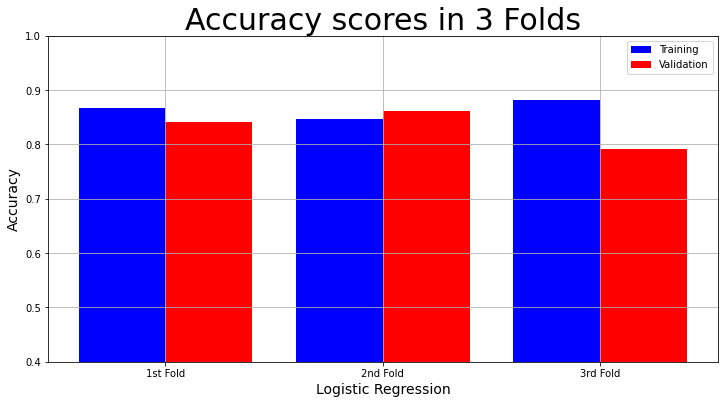

In [92]:
model_name = "Logistic Regression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            lr_results["Training Accuracy scores"],
            lr_results["Validation Accuracy scores"])

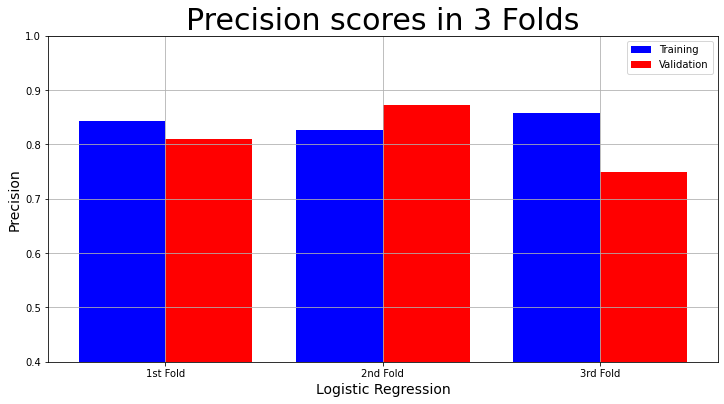

In [93]:
plot_result(model_name,
            "Precision",
            "Precision scores in 3 Folds",
            lr_results["Training Precision scores"],
            lr_results["Validation Precision scores"])

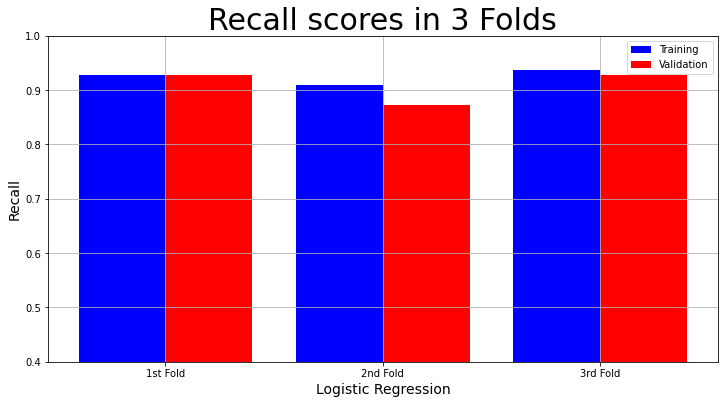

In [94]:
plot_result(model_name,
            "Recall",
            "Recall scores in 3 Folds",
            lr_results["Training Recall scores"],
            lr_results["Validation Recall scores"])

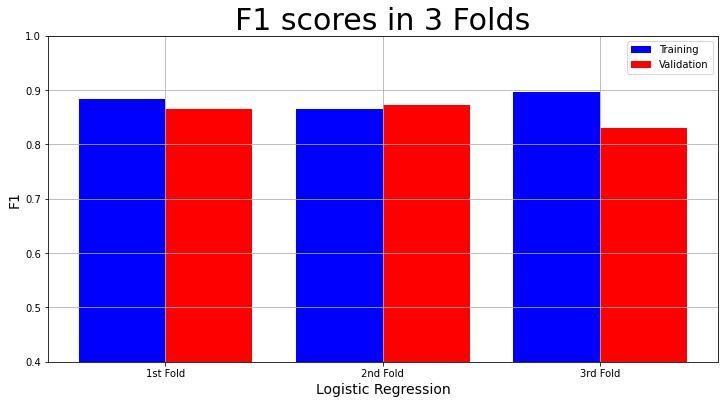

In [95]:
plot_result(model_name,
            "F1",
            "F1 scores in 3 Folds",
            lr_results["Training F1 scores"],
            lr_results["Validation F1 scores"])

In [96]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)

In [97]:
ada_results = cross_validation(adaboost,X,y,3)

In [98]:
print(ada_results)

{'Training Accuracy scores': array([0.96039604, 0.9950495 , 0.9950495 ]), 'Mean Training Accuracy': 98.34983498349835, 'Training Precision scores': array([0.96363636, 1.        , 0.99099099]), 'Mean Training Precision': 0.9848757848757849, 'Training Recall scores': array([0.96363636, 0.99090909, 1.        ]), 'Mean Training Recall': 0.9848484848484849, 'Training F1 scores': array([0.96363636, 0.99543379, 0.99547511]), 'Mean Training F1 Score': 0.9848484222376245, 'Validation Accuracy scores': array([0.86138614, 0.74257426, 0.74257426]), 'Mean Validation Accuracy': 78.21782178217823, 'Validation Precision scores': array([0.87272727, 0.73770492, 0.72307692]), 'Mean Validation Precision': 0.7778363712789943, 'Validation Recall scores': array([0.87272727, 0.81818182, 0.85454545]), 'Mean Validation Recall': 0.8484848484848485, 'Validation F1 scores': array([0.87272727, 0.77586207, 0.78333333]), 'Mean Validation F1 Score': 0.8106408916753743}


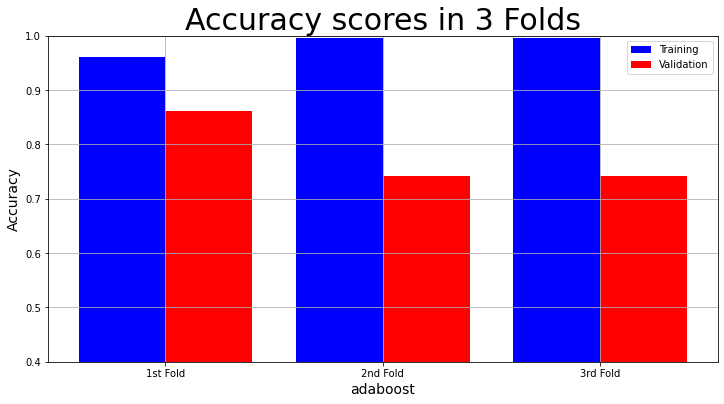

In [99]:
model_name = "adaboost"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            ada_results["Training Accuracy scores"],
            ada_results["Validation Accuracy scores"])




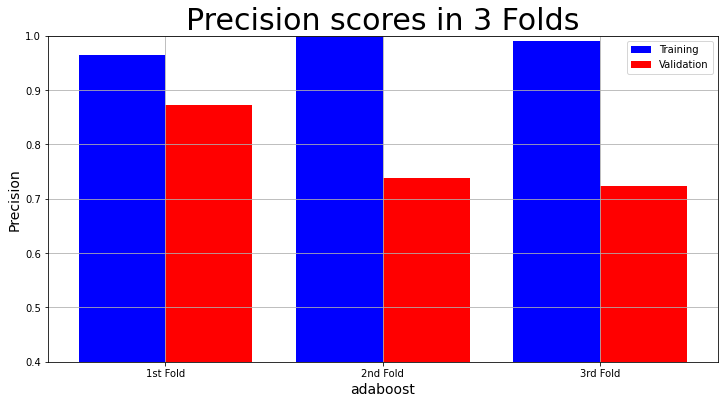

In [100]:
plot_result(model_name,
            "Precision",
            "Precision scores in 3 Folds",
            ada_results["Training Precision scores"],
            ada_results["Validation Precision scores"])




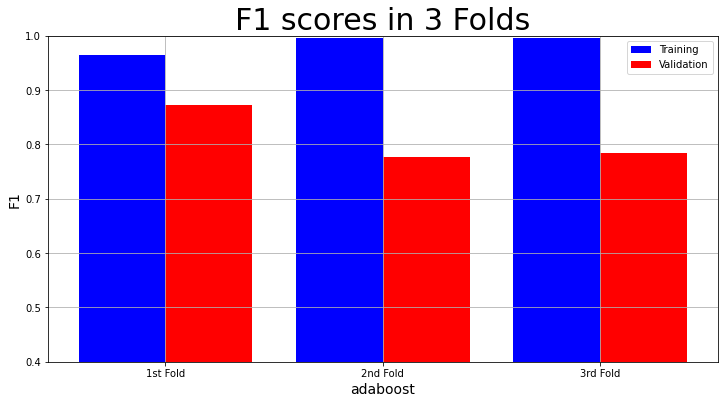

In [101]:
plot_result(model_name,
            "F1",
            "F1 scores in 3 Folds",
            ada_results["Training F1 scores"],
            ada_results["Validation F1 scores"])

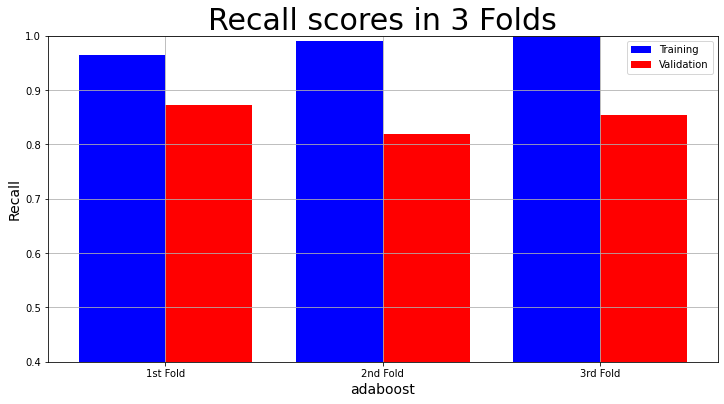

In [102]:
plot_result(model_name,
            "Recall",
            "Recall scores in 3 Folds",
            ada_results["Training Recall scores"],
            ada_results["Validation Recall scores"])

In [103]:
def plot_result(x_label, y_label, plot_title, train_data, val_data, train_data2, val_data2):
  
        plt.figure(figsize=(30,12))
        labels = ["1st Fold logistic vs adaboost","2nd Fold logistic vs adaboost","3rd Fold logistic vs adaboost"] 
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.1, color='blue', label='lrTraining')
        plt.bar(X_axis-0.1, val_data, 0.1, color='red', label='lrValidation')
        plt.bar(X_axis+0.1, train_data2, 0.1, color='green', label='adaTraining')
        plt.bar(X_axis+0.2, val_data2, 0.1, color='yellow', label='adaValidation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

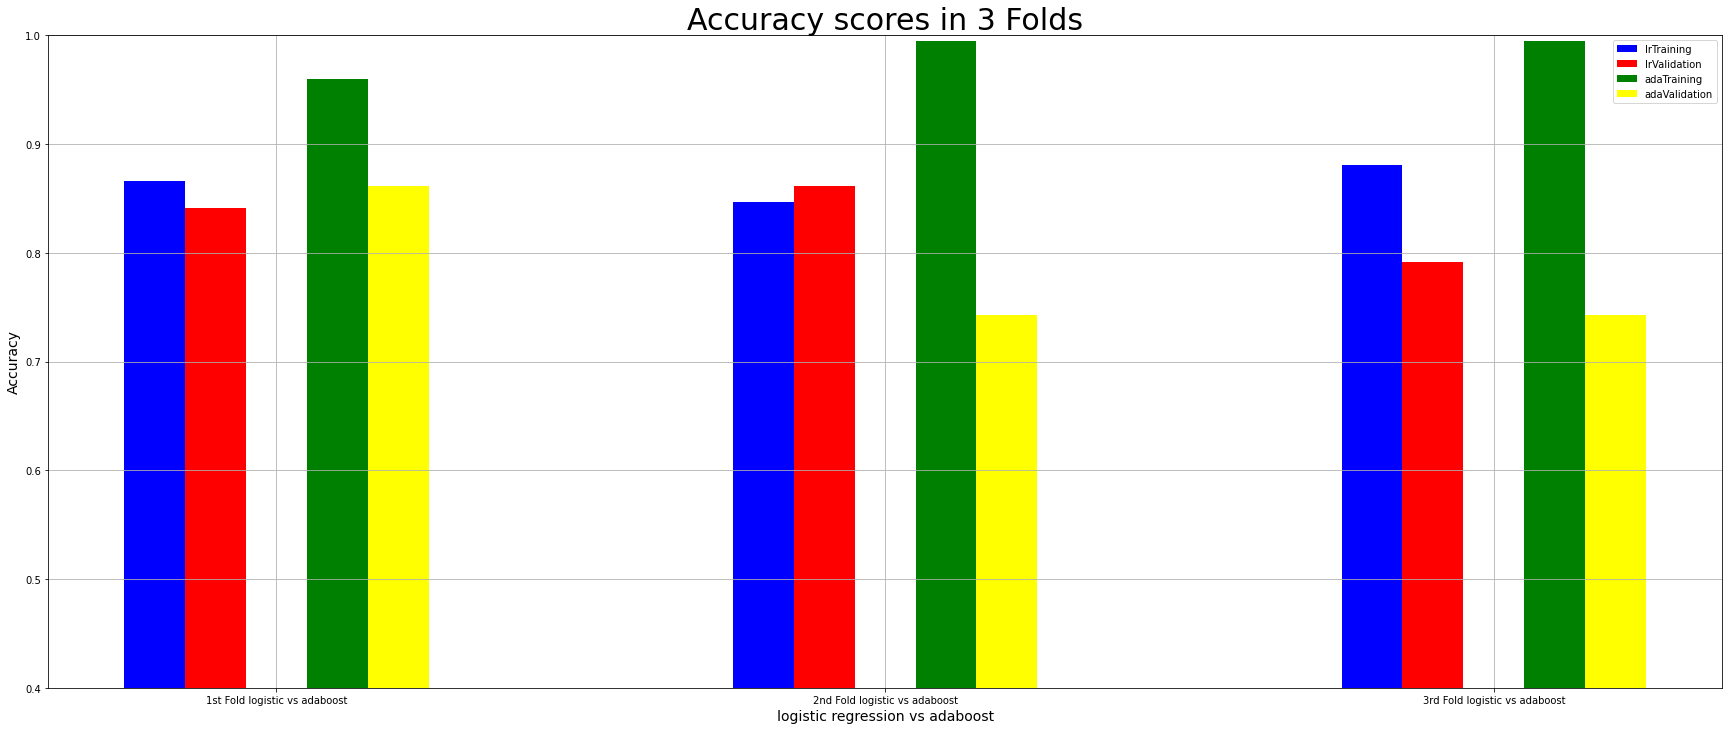

In [104]:
model_comp="logistic regression vs adaboost"
plot_result(model_comp,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            lr_results["Training Accuracy scores"],
            lr_results["Validation Accuracy scores"],
            ada_results["Training Accuracy scores"],
            ada_results["Validation Accuracy scores"])



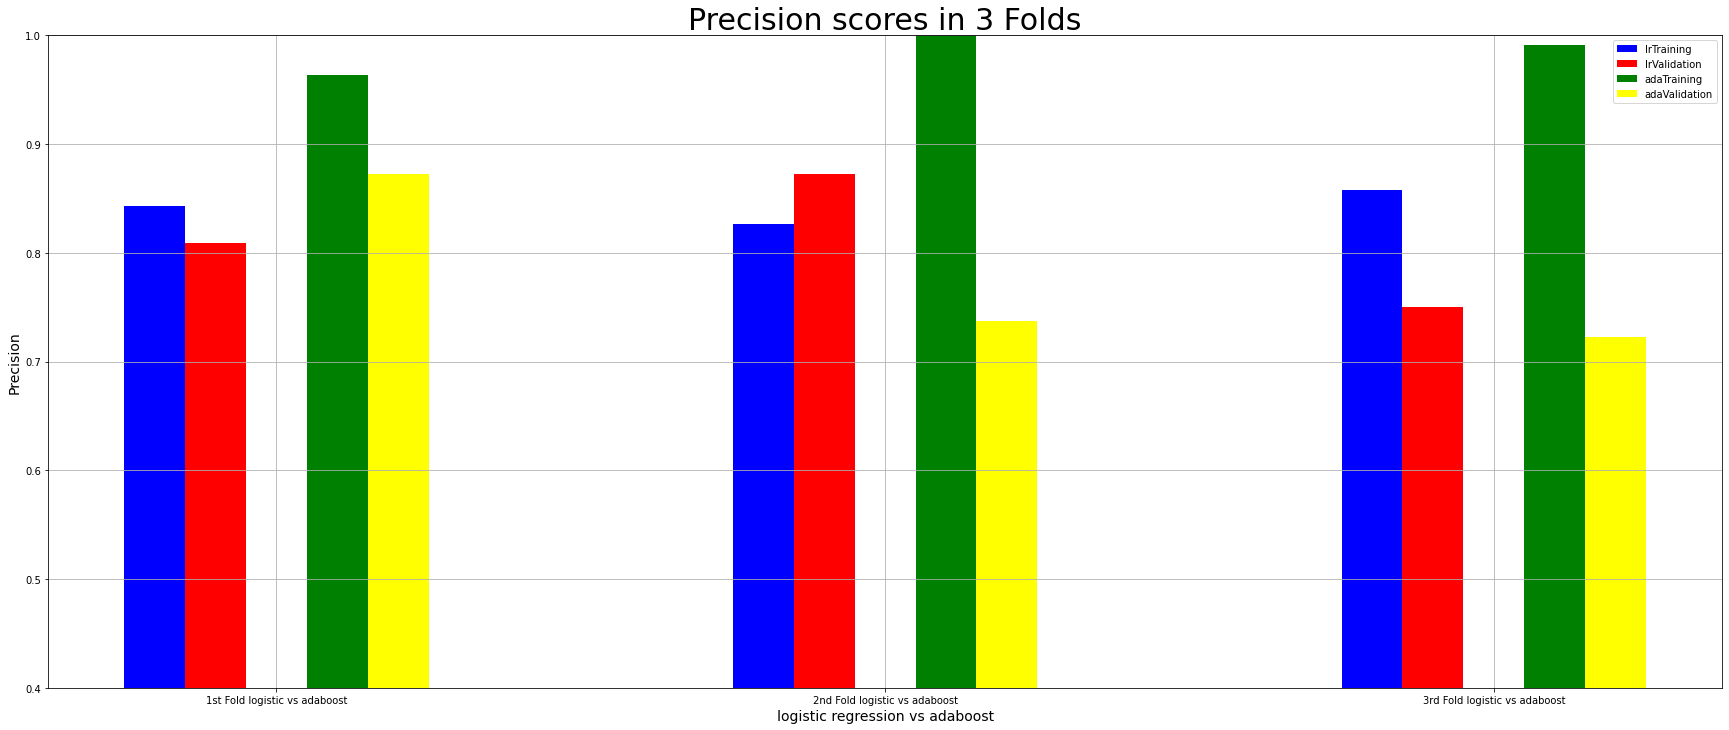

In [105]:
model_comp="logistic regression vs adaboost"
plot_result(model_comp,
            "Precision",
            "Precision scores in 3 Folds",
            lr_results["Training Precision scores"],
            lr_results["Validation Precision scores"],
            ada_results["Training Precision scores"],
            ada_results["Validation Precision scores"])

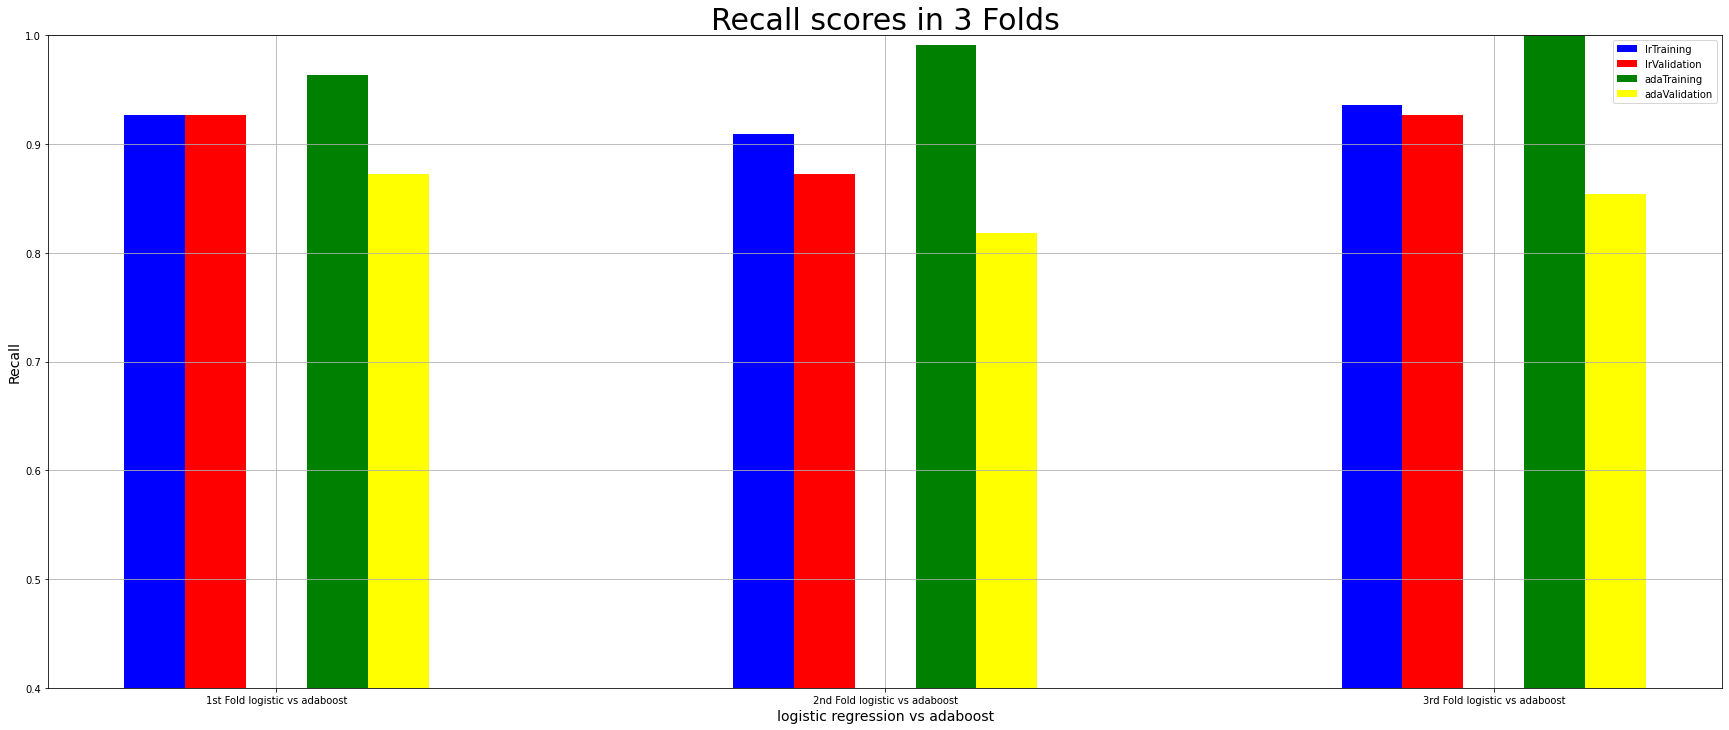

In [106]:
plot_result(model_comp,
            "Recall",
            "Recall scores in 3 Folds",
            lr_results["Training Recall scores"],
            lr_results["Validation Recall scores"],
            ada_results["Training Recall scores"],
            ada_results["Validation Recall scores"])


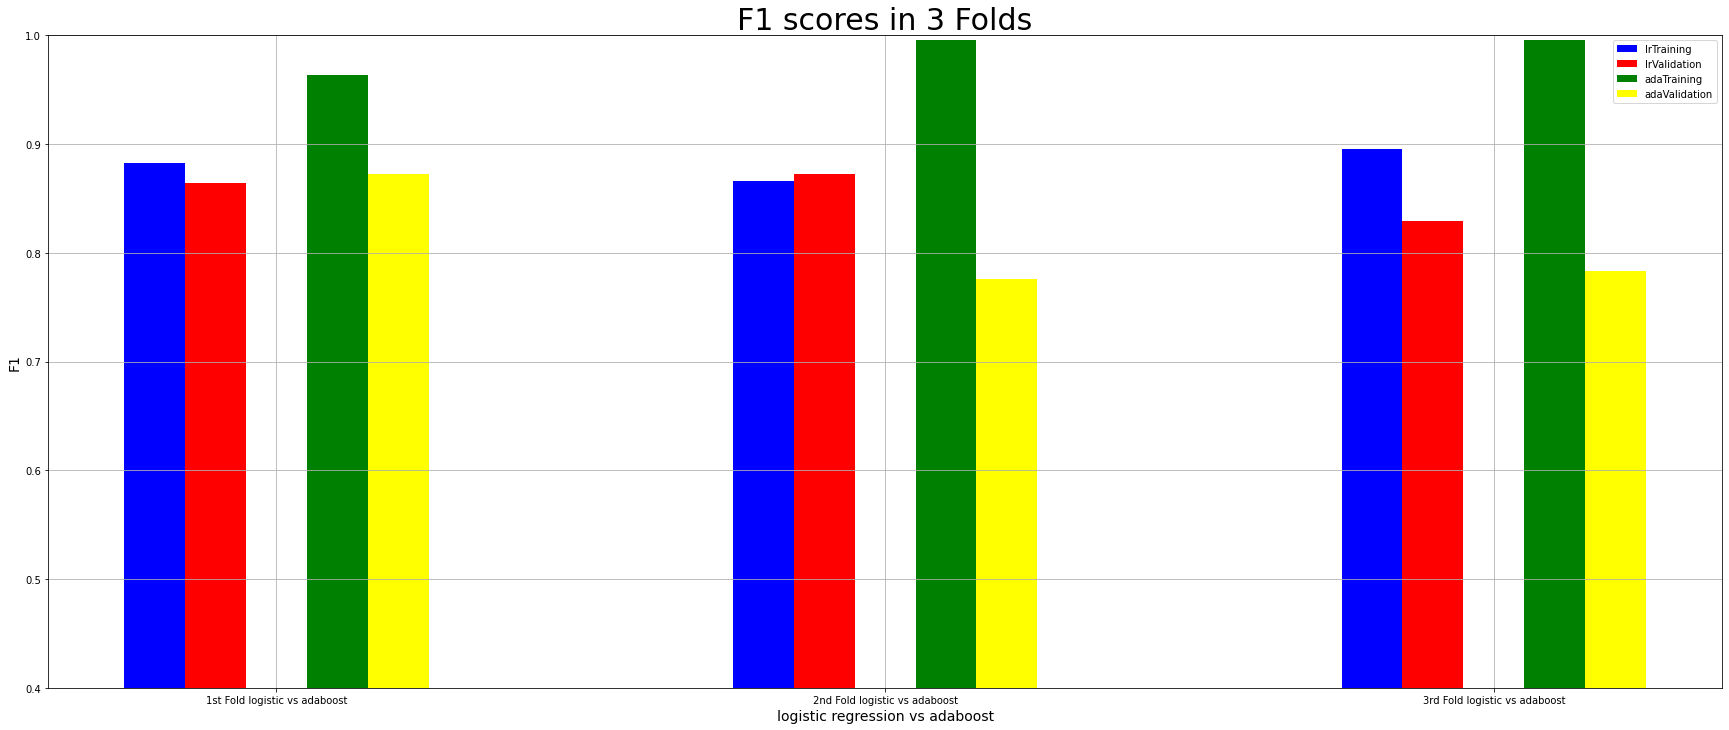

In [107]:
plot_result(model_comp,
            "F1",
            "F1 scores in 3 Folds",
            lr_results["Training F1 scores"],
            lr_results["Validation F1 scores"],
             ada_results["Training F1 scores"],
            ada_results["Validation F1 scores"])